# Pendahuluan
Notebook ini berisi analisis data terhadap banjir Jakarta dan nasional sebagai salah satu syarat untuk seleksi Data Science Academy Compfest 15 (2023)

## Identitas tim
Nama tim : Analystix

Anggota tim : 
1. Rayssa Ravelia
2. Wan Sabrina Mayzura
3. Dian Lies Dabukke

In [8]:
import pandas as pd
import os

# list all files in the directory
directory = os.path.expanduser("D:\Kegiatan\Compfest\Files\DKI")
files = os.listdir(directory)

In [9]:
columns_to_keep = ['kecamatan', 'kelurahan', 'rata_rata_ketinggian_air', 'lama_genangan', 'jiwa_terdampak', 'jumlah_jiwa_pengungsi_tertinggi', 'jumlah_tempat_pengungsian']

dataframes = []
csv_files = []

for file in files:
    if file.endswith(".csv") and "tahun" in file:
        year = file.split("tahun-")[1].split(".csv")[0]
        if year.isdigit() and int(year) <= 2020 and int(year) >= 2013:
            file_path = os.path.join(directory, file)
            df = pd.read_csv(file_path)
            
            # Menghapus kolom selain kolom yang diinginkan
            columns_to_remove = [col for col in df.columns if col not in columns_to_keep]
            df.drop(columns_to_remove, axis=1, inplace=True)
            
            # Menghapus baris dengan 5 atau lebih kolom bernilai 0 atau NULL
            df = df.dropna(thresh=len(df.columns) - 5 + 1)
            df = df[~(df.eq(0).sum(axis=1) >= 5)]
            
            dataframes.append(df)
            csv_files.append(file)
            
            # Menyimpan hasil ke file CSV baru
            new_file_path = os.path.join(directory, "cleaned_" + file)
            df.to_csv(new_file_path, index=False)

In [10]:
for file in csv_files:
    print(file)

cleaned_cleaned_data-rekapitulasi-kejadian-banjir-tahun-2013.csv
cleaned_cleaned_data-rekapitulasi-kejadian-banjir-tahun-2014.csv
cleaned_cleaned_data-rekapitulasi-kejadian-banjir-tahun-2015.csv
cleaned_cleaned_data-rekapitulasi-kejadian-banjir-tahun-2016.csv
cleaned_cleaned_data-rekapitulasi-kejadian-banjir-tahun-2017.csv
cleaned_cleaned_data-rekapitulasi-kejadian-banjir-tahun-2018.csv
cleaned_cleaned_data-rekapitulasi-kejadian-banjir-tahun-2019.csv
cleaned_cleaned_data-rekapitulasi-kejadian-banjir-tahun-2020.csv
cleaned_data-rekapitulasi-kejadian-banjir-tahun-2013.csv
cleaned_data-rekapitulasi-kejadian-banjir-tahun-2014.csv
cleaned_data-rekapitulasi-kejadian-banjir-tahun-2015.csv
cleaned_data-rekapitulasi-kejadian-banjir-tahun-2016.csv
cleaned_data-rekapitulasi-kejadian-banjir-tahun-2017.csv
cleaned_data-rekapitulasi-kejadian-banjir-tahun-2018.csv
cleaned_data-rekapitulasi-kejadian-banjir-tahun-2019.csv
cleaned_data-rekapitulasi-kejadian-banjir-tahun-2020.csv
data-rekapitulasi-kejadi

    kecamatan  kelurahan rata_rata_ketinggian_air  lama_genangan  \
0        35.0      124.0               10 - 400             15.0   
1        15.0       34.0               10 - 175              8.0   
2         5.0        9.0               10 - 250              2.0   
3        10.0       16.0               10 - 100              4.0   
4        10.0       16.0                0 - 160              3.0   
5         3.0        4.0                0 - 150              7.0   
6         6.0       10.0               10 - 180              4.0   
7         7.0       12.0               20 - 300              3.0   
8         5.0        5.0               20 - 100              3.0   
9         9.0       16.0               10 - 100              6.0   
10       11.0       17.0               10 - 200              4.0   

    jiwa_terdampak  jumlah_jiwa_pengungsi_tertinggi  jumlah_tempat_pengungsian  
0        1226487.0                          83554.0                     1115.0  
1          46865.0   

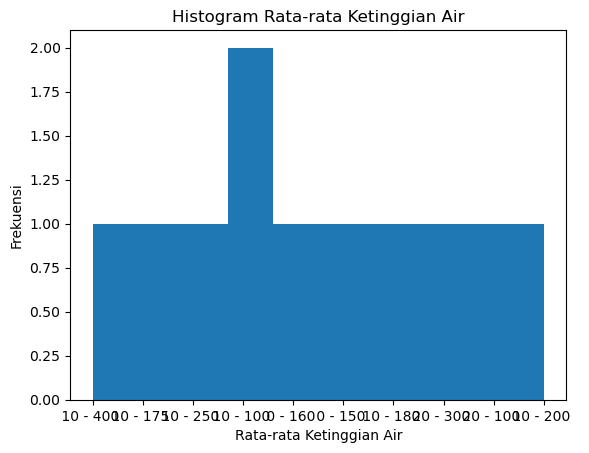

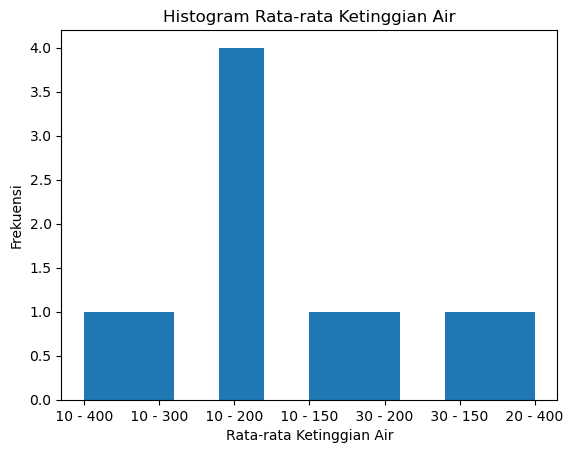

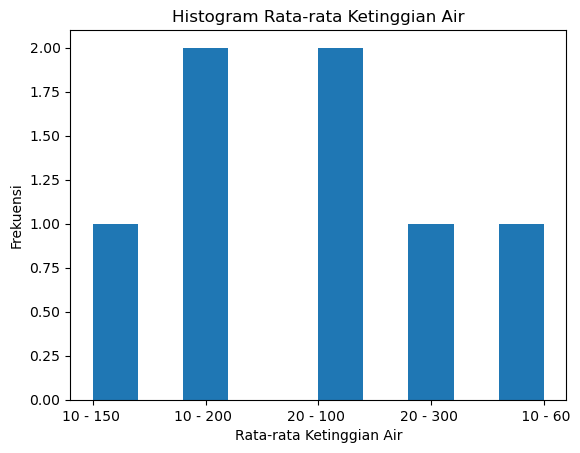

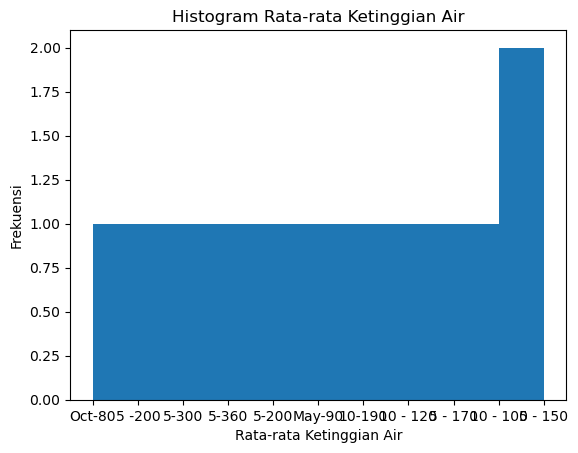

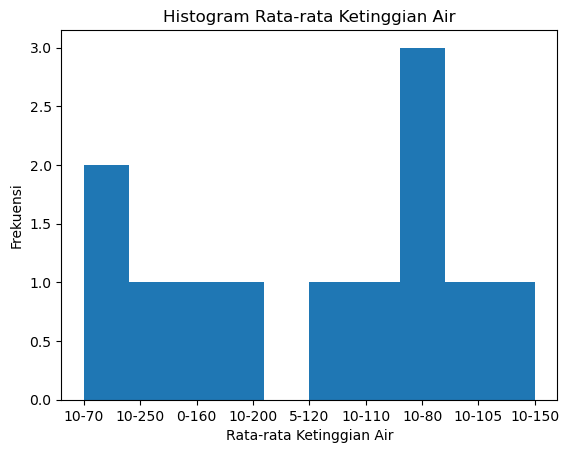

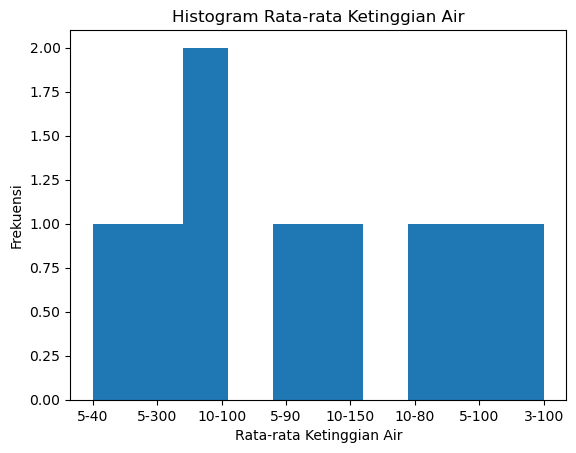

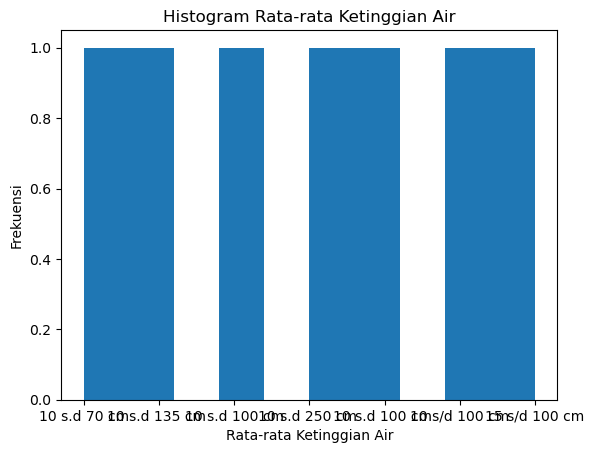

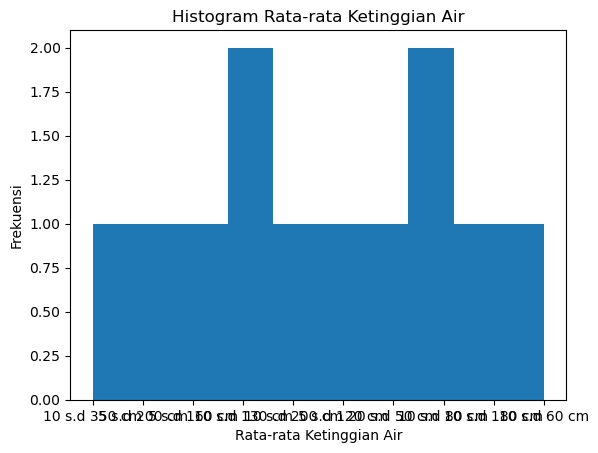

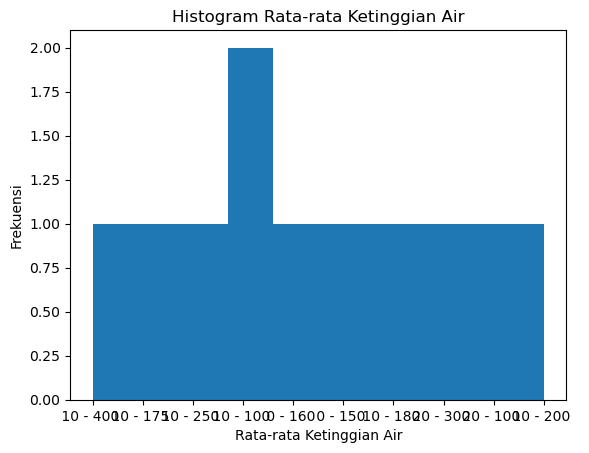

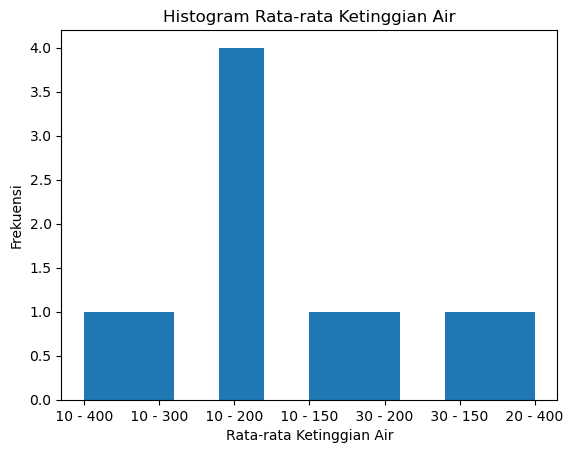

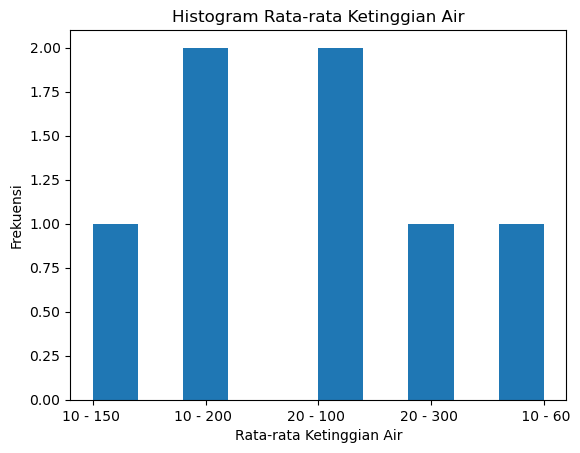

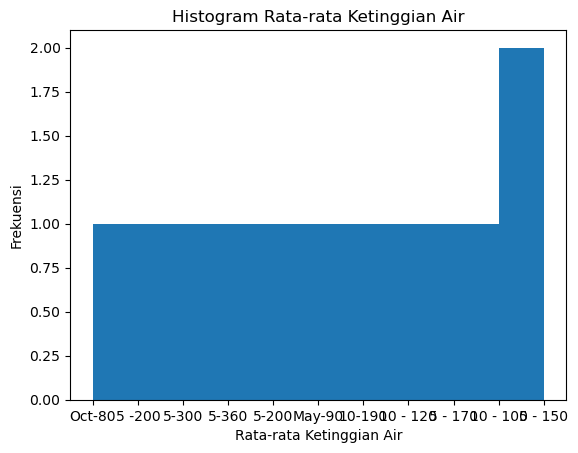

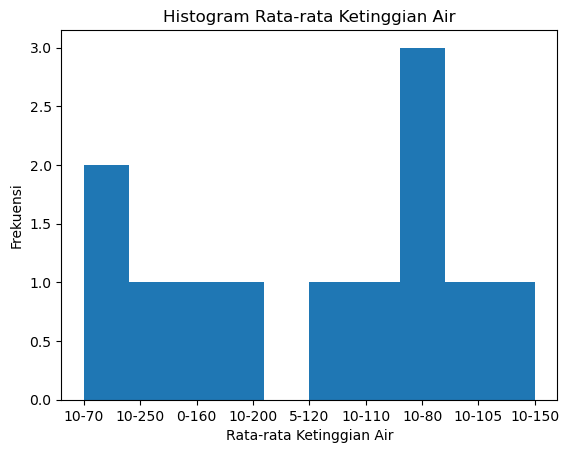

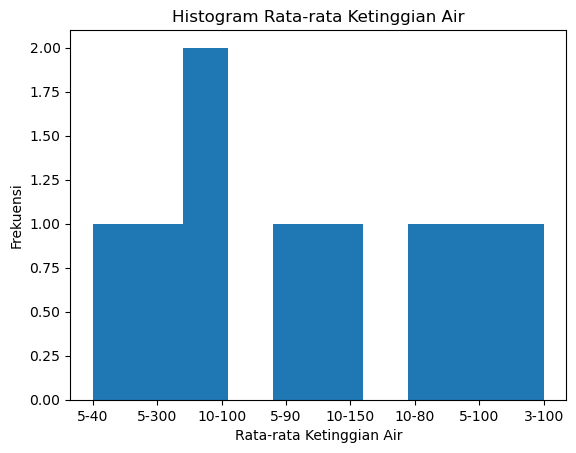

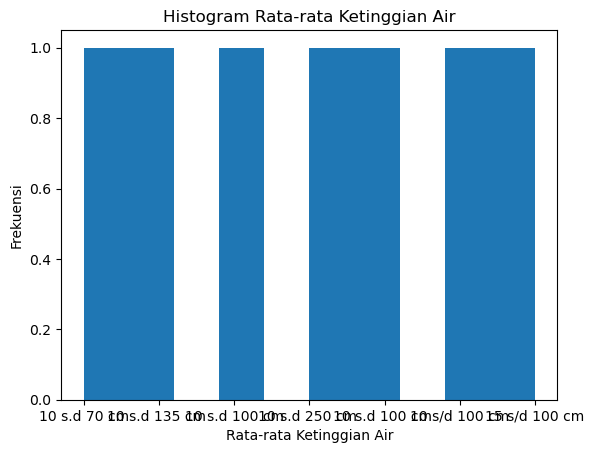

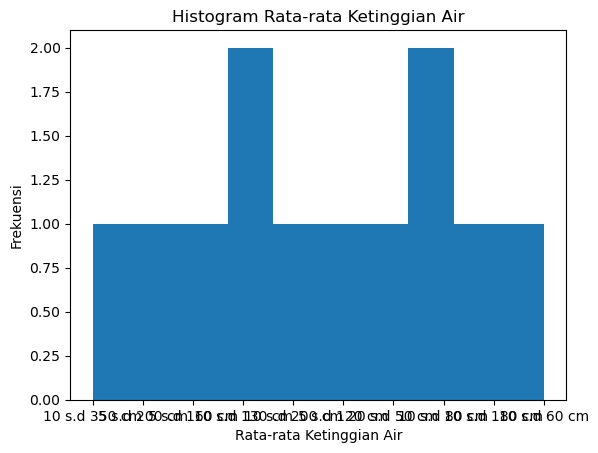

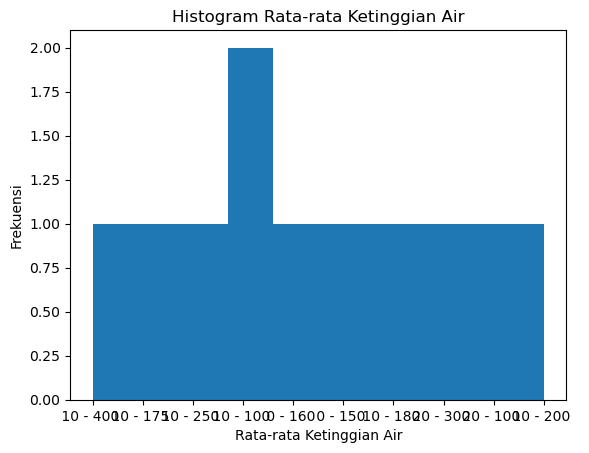

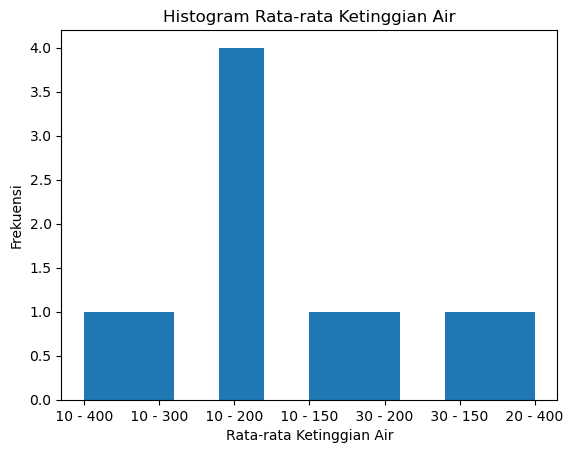

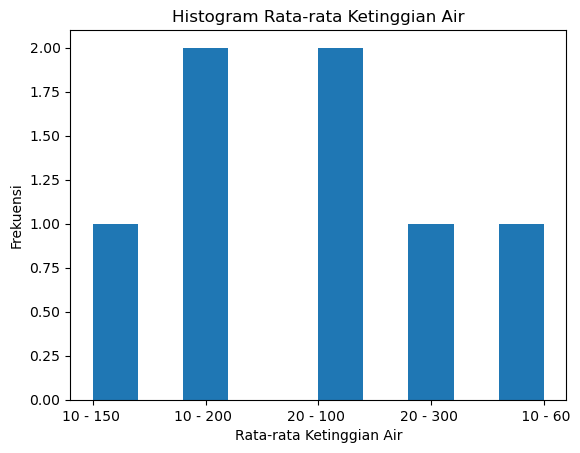

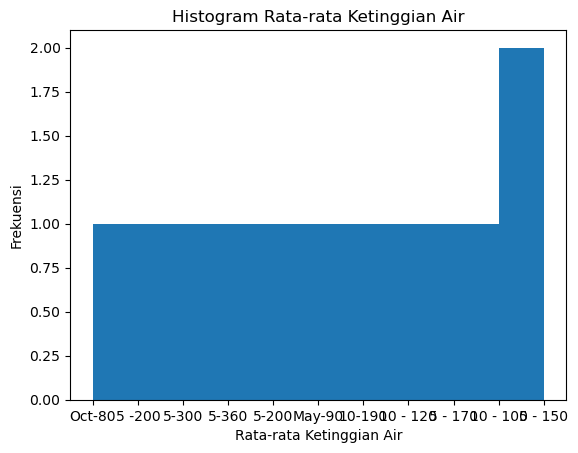

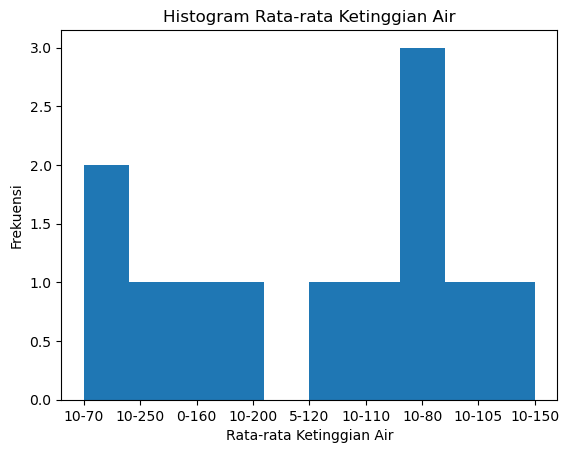

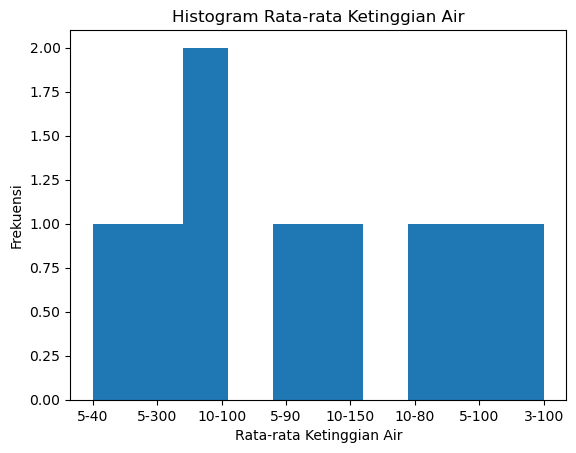

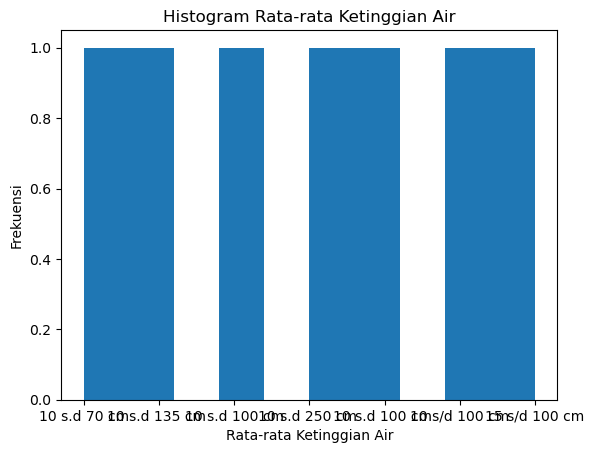

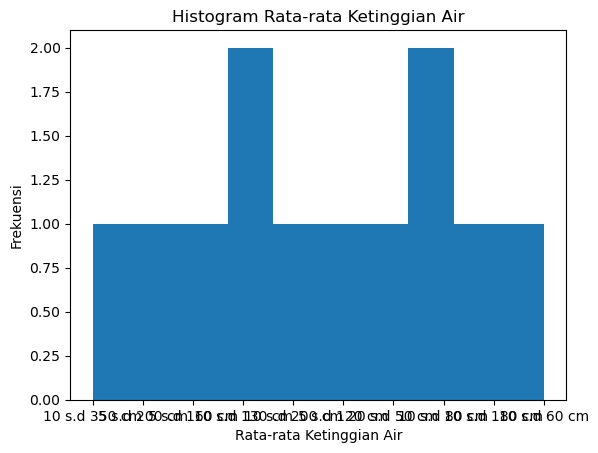

TypeError: Could not convert 1 s/d 2 1 s/d 6 1111111 to numeric

In [11]:
# Melakukan analisis tambahan atau manipulasi data
# Contoh: Menampilkan data dari setiap DataFrame
for df in dataframes:
    print(df)

# Contoh: Membuat plot histogram dari rata-rata ketinggian air
import matplotlib.pyplot as plt

for df in dataframes:
    plt.hist(df['rata_rata_ketinggian_air'])
    plt.xlabel('Rata-rata Ketinggian Air')
    plt.ylabel('Frekuensi')
    plt.title('Histogram Rata-rata Ketinggian Air')
    plt.show()

# Melakukan analisis statistik tambahan
# Contoh: Menghitung rata-rata lama genangan dari semua DataFrame
avg_lama_genangan = []
for df in dataframes:
    avg_lama_genangan.append(df['lama_genangan'].mean())

# Menampilkan hasil analisis
for i, file in enumerate(csv_files):
    print(f"File: {file}, Rata-rata Lama Genangan: {avg_lama_genangan[i]}")

# Melakukan prediksi atau analisis tambahan menggunakan machine learning atau metode lainnya

# Membuat laporan atau dokumentasi
# Contoh: Menyimpan laporan analisis ke file teks
report = "Laporan Analisis Banjir:\n\n"
for i, file in enumerate(csv_files):
    report += f"File: {file}, Rata-rata Lama Genangan: {avg_lama_genangan[i]}\n"
report_path = os.path.join(directory, "analysis_report.txt")
with open(report_path, 'w') as f:
    f.write(report)
